In [ ]:
from google.colab import drive
drive.mount('/content/drive')
%cd drive/MyDrive/DataColab/
!ls
#Load google drive

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
[Errno 2] No such file or directory: 'drive/MyDrive/DataColab/'
/content/drive/MyDrive/DataColab
2022.csv    ghcnd-stations.txt	test.csv	 USW00023234.csv.gz
cufile.log  map_chart.html	USW00023234.csv  weatherHistory.csv


In [ ]:
import pandas as pd
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
!wget https://www.ncei.noaa.gov/pub/data/ghcn/daily/by_station/USC00198368.csv.gz


--2023-12-13 21:24:33--  https://www.ncei.noaa.gov/pub/data/ghcn/daily/by_station/USC00198368.csv.gz
Resolving www.ncei.noaa.gov (www.ncei.noaa.gov)... 205.167.25.167, 205.167.25.178, 205.167.25.172, ...
Connecting to www.ncei.noaa.gov (www.ncei.noaa.gov)|205.167.25.167|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 218470 (213K) [application/gzip]
Saving to: ‘USC00198368.csv.gz’

USC00198368.csv.gz  100%[===================>] 213.35K  1.30MB/s    in 0.2s    

2023-12-13 21:24:33 (1.30 MB/s) - ‘USC00198368.csv.gz’ saved [218470/218470]



In [ ]:
!gunzip /content/drive/MyDrive/DataColab/USC00198368.csv.gz

In [ ]:
cols=["ID","date","ELEMENT","READING","M","Q","S","time"]
#Load Boston Station
df=pd.read_csv("USC00198368.csv",header=None,names=cols)

In [ ]:
df.loc[~df['Q'].isna(), 'READING'] = np.nan

In [ ]:
df2=df.pivot_table(index=['ID', 'date',], columns='ELEMENT', values='READING').reset_index()

In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 16 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      10754 non-null  object 
 1   date    10754 non-null  int64  
 2   PRCP    10751 non-null  float64
 3   SNOW    10743 non-null  float64
 4   SNWD    5951 non-null   float64
 5   TMAX    10698 non-null  float64
 6   TMIN    10687 non-null  float64
 7   TOBS    5395 non-null   float64
 8   WESD    1922 non-null   float64
 9   WESF    1767 non-null   float64
 10  WT01    161 non-null    float64
 11  WT03    155 non-null    float64
 12  WT04    32 non-null     float64
 13  WT05    11 non-null     float64
 14  WT06    8 non-null      float64
 15  WT11    4 non-null      float64
dtypes: float64(14), int64(1), object(1)
memory usage: 1.3+ MB


In [ ]:
df2.head()

ELEMENT,ID,date,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESD,WESF,WT01,WT03,WT04,WT05,WT06,WT11
0,USC00198368,19940701,0.0,0.0,NaN,283.0,178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00198368,19940702,0.0,0.0,NaN,289.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00198368,19940703,0.0,0.0,NaN,283.0,178.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00198368,19940704,0.0,0.0,NaN,289.0,167.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00198368,19940705,0.0,0.0,NaN,278.0,117.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df2['date'] = pd.to_datetime(df2['date'], format='%Y%m%d', errors='coerce')

In [ ]:
selected_cols=['ID','date','TMAX','TMIN','SNOW','PRCP']
df2=df2[selected_cols]


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10754 entries, 0 to 10753
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      10754 non-null  object        
 1   date    10754 non-null  datetime64[ns]
 2   TMAX    10698 non-null  float64       
 3   TMIN    10687 non-null  float64       
 4   SNOW    10743 non-null  float64       
 5   PRCP    10751 non-null  float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 504.2+ KB


In [ ]:
#SElect a start date(2000)
start_date = '2000-01-01'
print(start_date)

2000-01-01


In [ ]:
df2=df2[df2['date']>=start_date]


In [ ]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8746 entries, 2008 to 10753
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      8746 non-null   object        
 1   date    8746 non-null   datetime64[ns]
 2   TMAX    8718 non-null   float64       
 3   TMIN    8713 non-null   float64       
 4   SNOW    8736 non-null   float64       
 5   PRCP    8743 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 478.3+ KB


In [ ]:
df2=df2.reset_index(drop=True)

In [ ]:
df2.head()

ELEMENT,ID,date,TMAX,TMIN,SNOW,PRCP
0,USC00198368,2000-01-01,89.0,-83.0,0.0,0.0
1,USC00198368,2000-01-02,133.0,-17.0,0.0,5.0
2,USC00198368,2000-01-03,183.0,78.0,0.0,0.0
3,USC00198368,2000-01-04,156.0,56.0,0.0,300.0
4,USC00198368,2000-01-05,94.0,-50.0,0.0,79.0


In [ ]:
features_cols=['TMIN','TMAX','SNOW','PRCP']
for feat in features_cols:
  df2[feat]=df2[feat].interpolate(method='linear')

df2.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8746 entries, 0 to 8745
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ID      8746 non-null   object        
 1   date    8746 non-null   datetime64[ns]
 2   TMAX    8746 non-null   float64       
 3   TMIN    8746 non-null   float64       
 4   SNOW    8746 non-null   float64       
 5   PRCP    8746 non-null   float64       
dtypes: datetime64[ns](1), float64(4), object(1)
memory usage: 410.1+ KB


In [ ]:
df2.head()

ELEMENT,ID,date,TMAX,TMIN,SNOW,PRCP
0,USC00198368,2000-01-01,89.0,-83.0,0.0,0.0
1,USC00198368,2000-01-02,133.0,-17.0,0.0,5.0
2,USC00198368,2000-01-03,183.0,78.0,0.0,0.0
3,USC00198368,2000-01-04,156.0,56.0,0.0,300.0
4,USC00198368,2000-01-05,94.0,-50.0,0.0,79.0


In [ ]:
def generate_multivariate_data(input_data, target_data, start, end=None, window_len=100, pred_len=10):
    input_seq, target_seq = [], []

    if end is None:
        end = len(input_data) - pred_len

    for i in range(start, end):
        window_indices = range(i - window_len, i)
        input_seq.append(input_data[window_indices])
        target_seq.append(target_data[i:i + pred_len])

    return np.array(input_seq), np.array(target_seq)


In [ ]:
# Get the number of samples
n = len(df2)

# Define history and prediction windows for time series analysis
pastWindow = 180  # Number of past days to consider
pred = 30  # Number of days to predict into the future

# Set lengths for training, validation, and testing datasets
TRAIN_len = 7000
VAL_len = 1000
TEST_len = n - TRAIN_len - VAL_len - pastWindow - pred

# Define the columns of interest in the dataframe
feat_cols = ['TMAX', 'TMIN', 'PRCP', 'SNOW']

# Extract the specified columns from the dataframe
featdf = df2[feat_cols]

In [ ]:
featdf.head()

ELEMENT,TMAX,TMIN,PRCP,SNOW
0,89.0,-83.0,0.0,0.0
1,133.0,-17.0,5.0,0.0
2,183.0,78.0,0.0,0.0
3,156.0,56.0,300.0,0.0
4,94.0,-50.0,79.0,0.0


In [ ]:
def get_training_stats(dataset,traininglen):
  mean=dataset[:traininglen].mean(axis=0)
  std=dataset[:traininglen].std(axis=0)
  normalized=(dataset - mean) / std
  return normalized, mean, std


input_dataset,dataMean,dataStd=get_training_stats(featdf.values,TRAIN_len)

In [ ]:
#Setting up to predict TMAX variable(first column in dataset)

# Generate test dataset
x_test, y_test = generate_multivariate_data(input_dataset, input_dataset[:, 0], n - pred - TEST_len, n - pred, pastWindow, pred)
test_permutation = np.random.permutation(x_test.shape[0])
x_test, y_test = x_test[test_permutation], y_test[test_permutation]

# Generate shuffled dataset for training and validation
x_shuffle, y_shuffle = generate_multivariate_data(input_dataset, input_dataset[:, 0], pastWindow, n - pred - TEST_len, pastWindow, pred)
shuffle_permutation = np.random.permutation(x_shuffle.shape[0])
x_shuffle, y_shuffle = x_shuffle[shuffle_permutation], y_shuffle[shuffle_permutation]

# Split shuffled dataset into training and validation sets
x_train, x_val = x_shuffle[:TRAIN_len, :, :], x_shuffle[TRAIN_len:, :, :]
y_train, y_val = y_shuffle[:TRAIN_len, :], y_shuffle[TRAIN_len:, :]

# Print shapes of the datasets
print('x_train shape = ',x_train.shape,'| x_val shape = ',x_val.shape,'| x_test shape = ',x_test.shape)
print('y_train shape = ',y_train.shape,'| y_val shape = ',y_val.shape,'| y_test shape = ',y_test.shape)

x_train shape =  (7000, 180, 4) | x_val shape =  (1000, 180, 4) | x_test shape =  (536, 180, 4)
y_train shape =  (7000, 30) | y_val shape =  (1000, 30) | y_test shape =  (536, 30)


In [ ]:
import tensorflow as tf

In [ ]:
tf.random.set_seed(2019)

BATCH_SIZE = 256

# Create TensorFlow Datasets
train_dataset = tf.data.Dataset.from_tensor_slices((x_train, y_train))
train_dataset = train_dataset.cache().batch(BATCH_SIZE).repeat()

val_dataset = tf.data.Dataset.from_tensor_slices((x_val, y_val))
val_dataset = val_dataset.batch(BATCH_SIZE).repeat()

test_dataset = tf.data.Dataset.from_tensor_slices((x_test, y_test))
test_dataset = test_dataset.batch(BATCH_SIZE).repeat()

In [ ]:
def plot_instance(ax, history, target):
    history_x = np.arange(-len(history), 0)
    target_x = np.arange(len(target))

    # Plot the history window
    sns.lineplot(x=history_x, y=(np.array(history[:, 0]) * dataStd[0] + dataMean[0])/10, color='C7', label='history', ax=ax)

    # Plot the connection between the history window and the target window
    sns.lineplot(x=[history_x[-1], target_x[0]],y=(np.array([np.array(history[:, 0])[-1], np.array(target)[0]]) * dataStd[0] + dataMean[0])/10,color='k', linestyle='--', label='__nolegend__', ax=ax)

    # Plot the target window
    sns.lineplot(x=target_x,y=(np.array(target) * dataStd[0] + dataMean[0])/10,color='k', label='target', ax=ax)


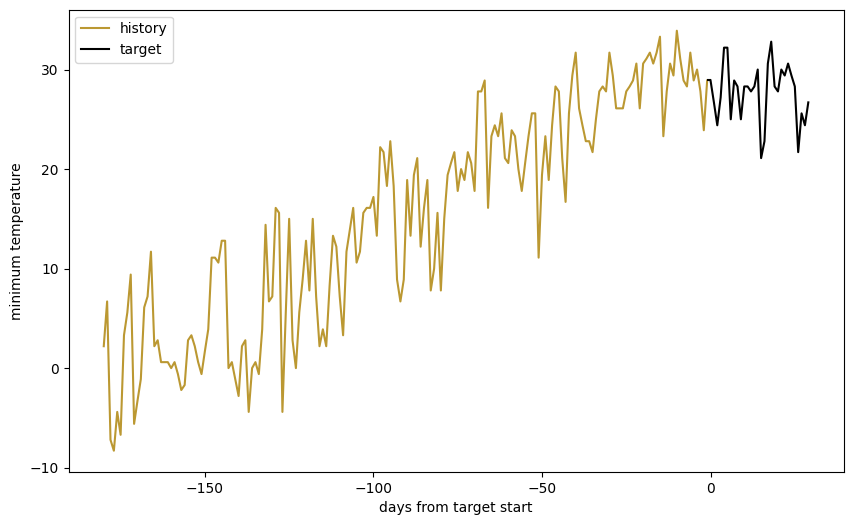

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))

for x, y in train_dataset.take(1):
    plot_instance(ax, x[0], y[0])

ax.legend(loc='upper left')
ax.set_xlabel('days from target start')
ax.set_ylabel('minimum temperature')

plt.show()

In [ ]:
from tensorflow.keras import layers, models

# Define the model
model = models.Sequential([
    layers.LSTM(32, input_shape=x_train.shape[-2:], return_sequences=True),
    layers.LSTM(16, return_sequences=True),
    layers.LSTM(8, activation='relu'),
    layers.Dense(pred)
])

# Compile the model
model.compile(
    optimizer=tf.keras.optimizers.RMSprop(clipvalue=1.0),
    loss=tf.keras.losses.MeanSquaredError(),
    metrics=[tf.keras.metrics.RootMeanSquaredError()]
)

# Display model summary
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_9 (LSTM)               (None, 180, 32)           4736      
                                                                 
 lstm_10 (LSTM)              (None, 180, 16)           3136      
                                                                 
 lstm_11 (LSTM)              (None, 8)                 800       
                                                                 
 dense_3 (Dense)             (None, 30)                270       
                                                                 
Total params: 8942 (34.93 KB)
Trainable params: 8942 (34.93 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
EPOCHS = 15
VALIDATION_STEPS = 50
EVALUATION_INTERVAL = 200

# Train the model
modeltrain = model.fit(train_dataset,epochs=EPOCHS,steps_per_epoch=EVALUATION_INTERVAL,validation_data=val_dataset,validation_steps=VALIDATION_STEPS)

Epoch 1/15
200/200 [==============================] - 98s 452ms/step - loss: 0.5215 - root_mean_squared_error: 0.7222 - val_loss: 0.3011 - val_root_mean_squared_error: 0.5487
Epoch 2/15
200/200 [==============================] - 88s 441ms/step - loss: 0.2621 - root_mean_squared_error: 0.5120 - val_loss: 0.2522 - val_root_mean_squared_error: 0.5022
Epoch 3/15
200/200 [==============================] - 93s 468ms/step - loss: 0.2367 - root_mean_squared_error: 0.4865 - val_loss: 0.2310 - val_root_mean_squared_error: 0.4807
Epoch 4/15
200/200 [==============================] - 93s 464ms/step - loss: 0.2295 - root_mean_squared_error: 0.4791 - val_loss: 0.2273 - val_root_mean_squared_error: 0.4768
Epoch 5/15
200/200 [==============================] - 89s 446ms/step - loss: 0.2263 - root_mean_squared_error: 0.4757 - val_loss: 0.2285 - val_root_mean_squared_error: 0.4781
Epoch 6/15
200/200 [==============================] - 88s 442ms/step - loss: 0.2238 - root_mean_squared_error: 0.4731 - val_l

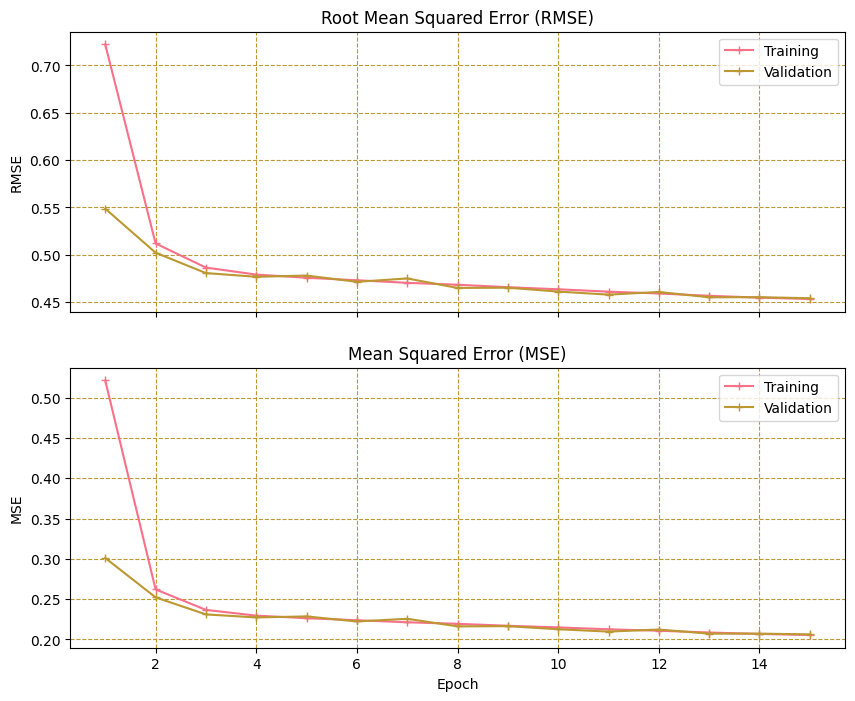

In [ ]:
# Extract metrics from the model training history
rmse = modeltrain.history['root_mean_squared_error']
val_rmse = modeltrain.history['val_root_mean_squared_error']

loss = modeltrain.history['loss']
val_loss = modeltrain.history['val_loss']

# Create subplots for RMSE and MSE
fig, ax = plt.subplots(nrows=2, ncols=1, figsize=(10, 8), sharex=True)

x_plot = np.arange(1, EPOCHS+1)

# Plot RMSE
ax[0].plot(x_plot, rmse, '+-', label='Training')  # Training RMSE
ax[0].plot(x_plot, val_rmse, '+-', label='Validation')  # Validation RMSE
ax[0].legend()
ax[0].set_ylabel('RMSE')  # Set y-axis label
ax[0].grid(ls='--', c='C7')  # Add grid with dashed lines
ax[0].set_title('Root Mean Squared Error (RMSE)')  # Set plot title for RMSE

# Plot MSE
ax[1].plot(x_plot, loss, '+-', label='Training')  # Training MSE
ax[1].plot(x_plot, val_loss, '+-', label='Validation')  # Validation MSE
ax[1].legend()
ax[1].set_ylabel('MSE')  # Set y-axis label
ax[1].grid(ls='--', c='C7')  # Add grid with dashed lines
ax[1].set_title('Mean Squared Error (MSE)')  # Set plot title for MSE
ax[1].set_xlabel('Epoch')  # Set x-axis label

# Display the plot
plt.show()

In [ ]:
import seaborn as sns

def plot_monthly_prediction(time_ax, diff_ax, history, target, prediction):
    # Generate x-axis values for the history and target windows
    history_x = np.arange(-len(history), 0)
    target_x = np.arange(len(target))

    # Set Seaborn color palette
    sns.set_palette("husl")

    # Plot the historical data on the time axis
    time_ax.plot(history_x,
                 np.array(history[:, 0]) * dataStd[0] + dataMean[0],
                 label='History')

    # Plot the connection between the history window and the target window
    time_ax.plot([history_x[-1], target_x[0]],
                 np.array([np.array(history[:, 0])[-1], np.array(target)[0]]) * dataStd[0] + dataMean[0],
                 ls='--', label='__nolegend__')

    # Plot the target window on the time axis
    time_ax.plot(target_x,
                 np.array(target) * dataStd[0] + dataMean[0],
                 label='Target')

    # Plot the connection between the history window and the prediction window
    time_ax.plot([history_x[-1], target_x[0]],
                 np.array([np.array(history[:, 0])[-1], np.array(prediction)[0]]) * dataStd[0] + dataMean[0],
                 ls='--', label='__nolegend__')

    # Plot the prediction window on the time axis
    time_ax.plot(target_x,
                 np.array(prediction) * dataStd[0] + dataMean[0],
                 label='Prediction')

    # Plot the difference between prediction and target on the diff axis
    diff_ax.plot(target_x,
                 (np.array(prediction) - np.array(target)) * dataStd[0],
                 label='Prediction - Target')

    # Add a horizontal dashed line at y=0 on the difference axis
    diff_ax.axhline(0, ls='--', label='Zero Line')

    # Set labels and title
    time_ax.set_xlabel('Days')
    time_ax.set_ylabel('Temperature')
    time_ax.set_title('Monthly Prediction')

    # Set labels and title for the difference axis
    diff_ax.set_xlabel('Days')
    diff_ax.set_ylabel('Difference')
    diff_ax.set_title('Prediction - Target Difference')

    # Display legend
    time_ax.legend()
    diff_ax.legend()

8/8 [==============================] - 0s 48ms/step


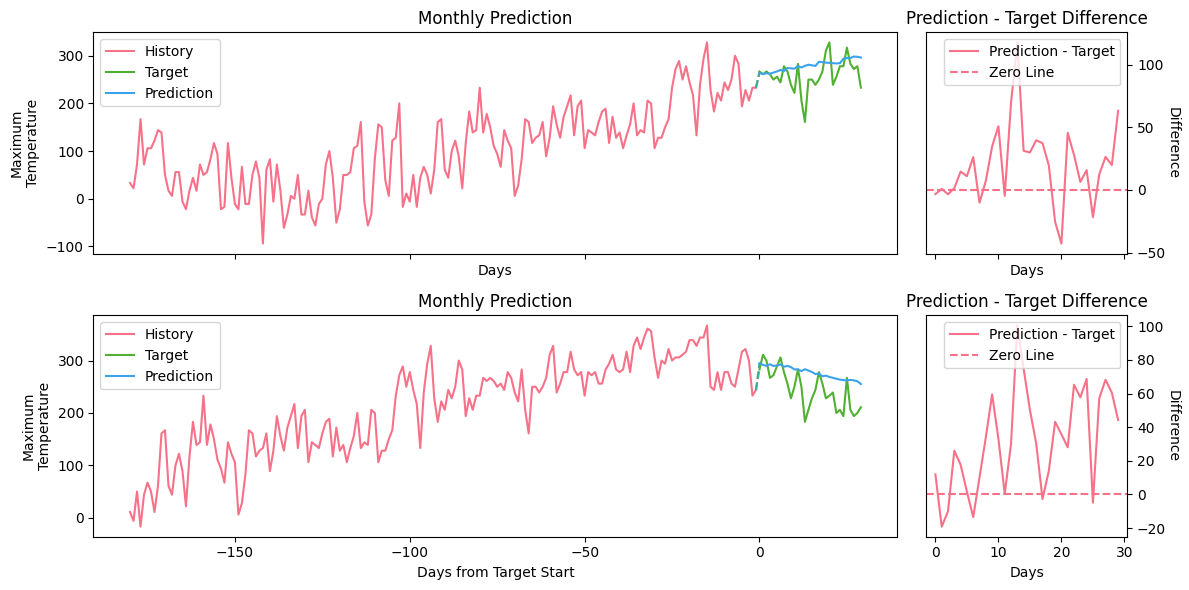

In [ ]:
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12, 6), sharex='col', gridspec_kw={'width_ratios': [1, 0.25]})

# Set a random seed for reproducibility
np.random.seed(22)
i = 0

# Take a batch for 2 months
for x, y in test_dataset.take(2):

    # Get an instance within that batch
    rand_ind = np.random.choice(np.arange(x.shape[0]), size=1)[0]

    # Predict and plot using the plot_monthly_prediction function
    plot_monthly_prediction(ax[i][0], ax[i][1], x[rand_ind], y[rand_ind], model.predict(x)[rand_ind])

    # Set y-axis labels and positions
    ax[i][0].set_ylabel('Maximum\nTemperature')
    ax[i][1].yaxis.tick_right()
    ax[i][1].yaxis.set_label_position('right')
    ax[i][1].set_ylabel('Difference', rotation=270, labelpad=10)

    # Increment the counter
    i += 1

# Set legend for the first subplot in the first row
ax[0][0].legend(loc='upper left')

# Set x-axis label for the last subplot in the last row
ax[1][0].set_xlabel('Days from Target Start')

# Adjust layout
fig.tight_layout()

# Display the plot
plt.show(fig)